# Milestone 2

# 1 - Perkenalan

Nama : Muhamad Natual Hisak

Batch : FTDS-016-RMT

Dataset 1 : Flight Prices<br> (https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction)

Objective 1 : Prediksi ticket price airline Vistara

# 2 - Import Libraries

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
import warnings
import joblib

# 3 - Data Loading

In [231]:
warnings.filterwarnings("ignore")

Load dataset

In [232]:
df = pd.read_csv(r'C:\Users\Omen\Desktop\Hacktiv8\P1\Milestone 2\Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [233]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


Copy data ke variabel baru

In [234]:
dfc = df.copy()

In [235]:
df = df.loc[(df.airline == "Vistara")]
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060


In [236]:
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
1,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
2,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
3,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
4,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060


Save dataset yang hanya berisi Vistara airline

In [237]:
df.to_csv('Vistara.csv')

# 4 - Exploratory Data Analysis (EDA)

In [238]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127859 entries, 0 to 127858
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        127859 non-null  int64  
 1   airline           127859 non-null  object 
 2   flight            127859 non-null  object 
 3   source_city       127859 non-null  object 
 4   departure_time    127859 non-null  object 
 5   stops             127859 non-null  object 
 6   arrival_time      127859 non-null  object 
 7   destination_city  127859 non-null  object 
 8   class             127859 non-null  object 
 9   duration          127859 non-null  float64
 10  days_left         127859 non-null  int64  
 11  price             127859 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 11.7+ MB


Tidak ada missing value

lihat unique value tiap kolom

In [239]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [240]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [241]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [242]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [243]:
df['arrival_time'].unique()

array(['Afternoon', 'Morning', 'Evening', 'Night', 'Early_Morning',
       'Late_Night'], dtype=object)

In [244]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [245]:
df['duration'].max()

47.08

In [246]:
df['departure_time'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Early_Morning', 'Night'],
      dtype=object)

Cek korelasi dengan spearman

In [247]:
df.corr()

,Unnamed: 0,duration,days_left,price
Unnamed: 0,1.000000,0.071752,0.032562,0.787599
duration,0.071752,1.000000,-0.032839,0.057582
days_left,0.032562,-0.032839,1.000000,-0.068856
price,0.787599,0.057582,-0.068856,1.000000


Perbandingan penerbangan kelas ekonomi dan bisnis

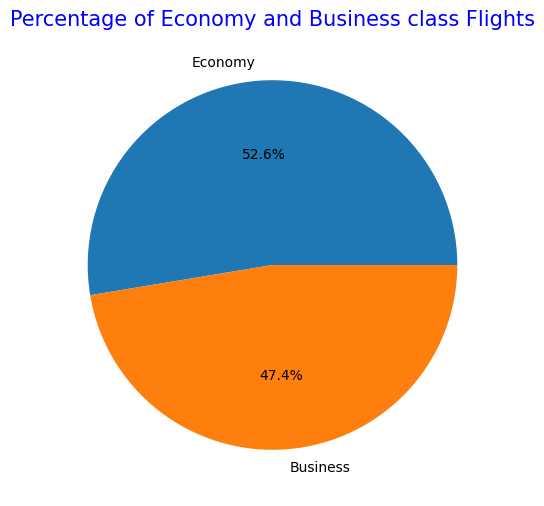

In [248]:
plt.figure(figsize =(10,6))
plt.title('Percentage of Economy and Business class Flights', fontsize=15, color='Blue')
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

Kelas ekonomi lebih banyak sekitar 15% dari kelas bisnis


Lihat lineplot pengaruh seilisih hari keberangkatan dengan harga tiket


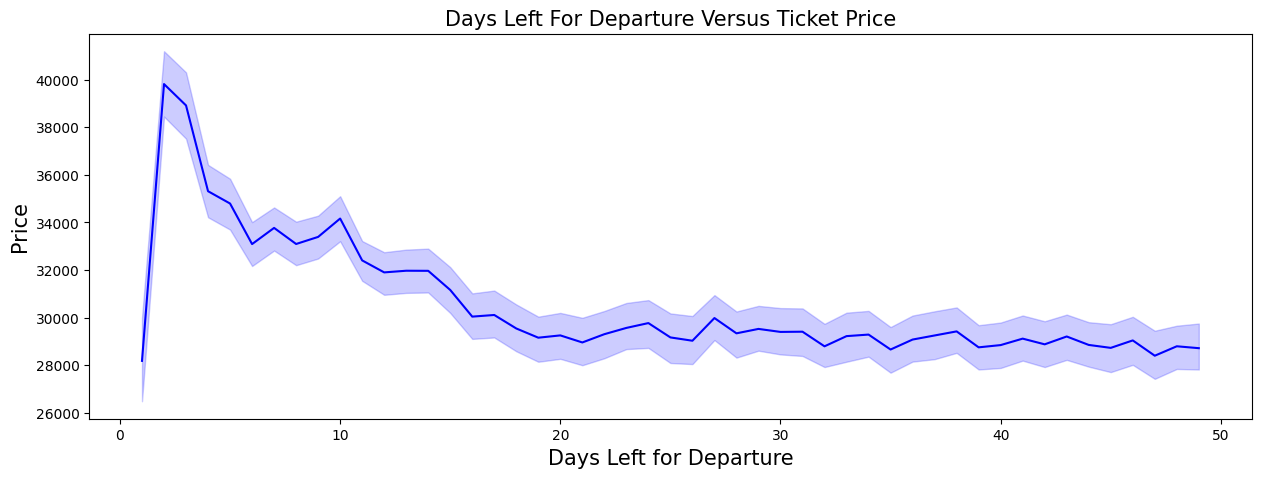

In [249]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Bisa dilihat, semakin jauh dari hari keberangkatan, semakin murah harga tiket.

Lihat harga tiket berdasarkan waktu keberangkatan

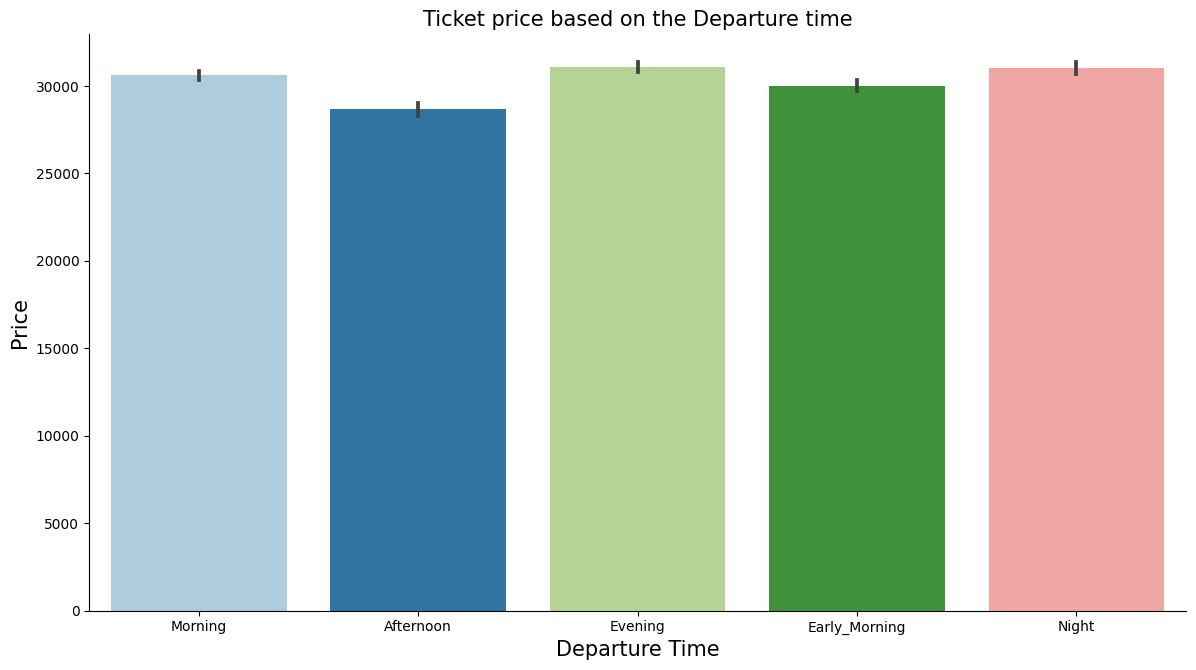

In [250]:
sns.catplot(data=df, kind="bar", x="departure_time", y="price", height=6.5, aspect=12/6.5 ,palette='Paired')
plt.title('Ticket price based on the Departure time',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Hanya ada sedikit perbedaan antar waktu keberangkatan dengan harga tiket

Lihat barplot harga tiket berdasarkan lokasi tujuan

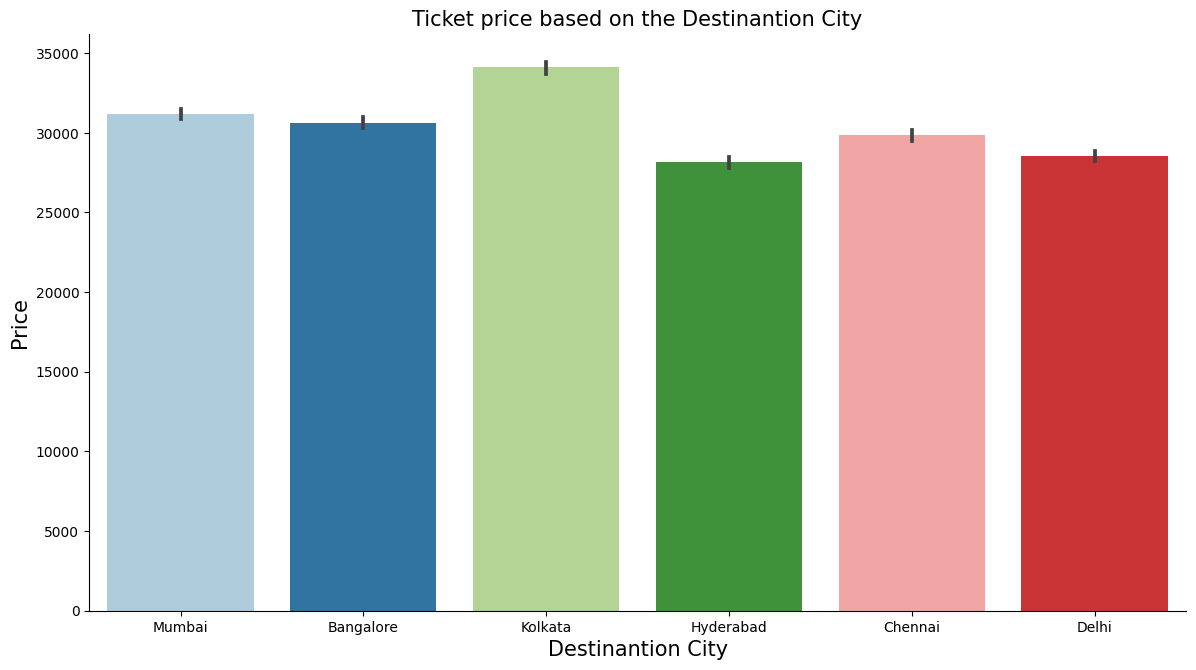

In [251]:
sns.catplot(data=df, kind="bar", x="destination_city", y="price", height=6.5, aspect=12/6.5 ,palette='Paired')
plt.title('Ticket price based on the Destinantion City',fontsize=15)
plt.xlabel('Destinantion City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Paling murah adalah penerbangan ke Hyderabad dan paling mahal ke Kolkata

Lihat barplot harga tiket berdasarkan lokasi keberangkatan

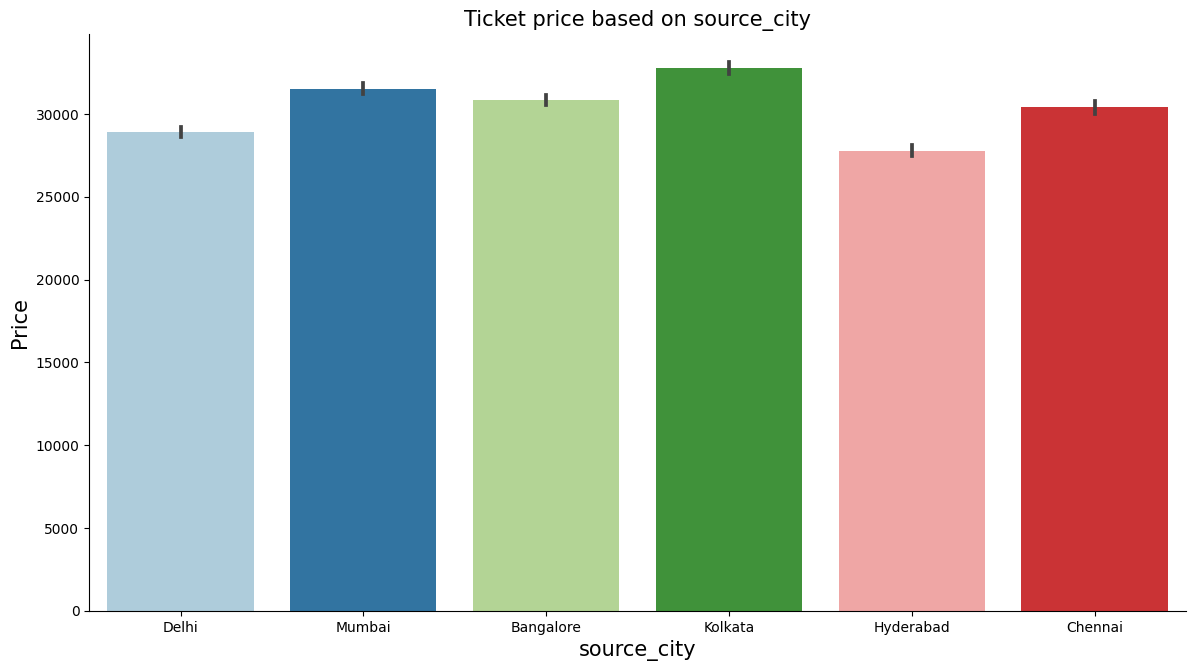

In [252]:
sns.catplot(data=df, kind="bar", x="source_city", y="price", height=6.5, aspect=12/6.5 ,palette='Paired')
plt.title('Ticket price based on source_city',fontsize=15)
plt.xlabel('source_city',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Paling murah adalah penerbangan dari Delhi dan paling mahal dari Kolkata

Lihat plot harga tiket berdasarkan jumlah transit

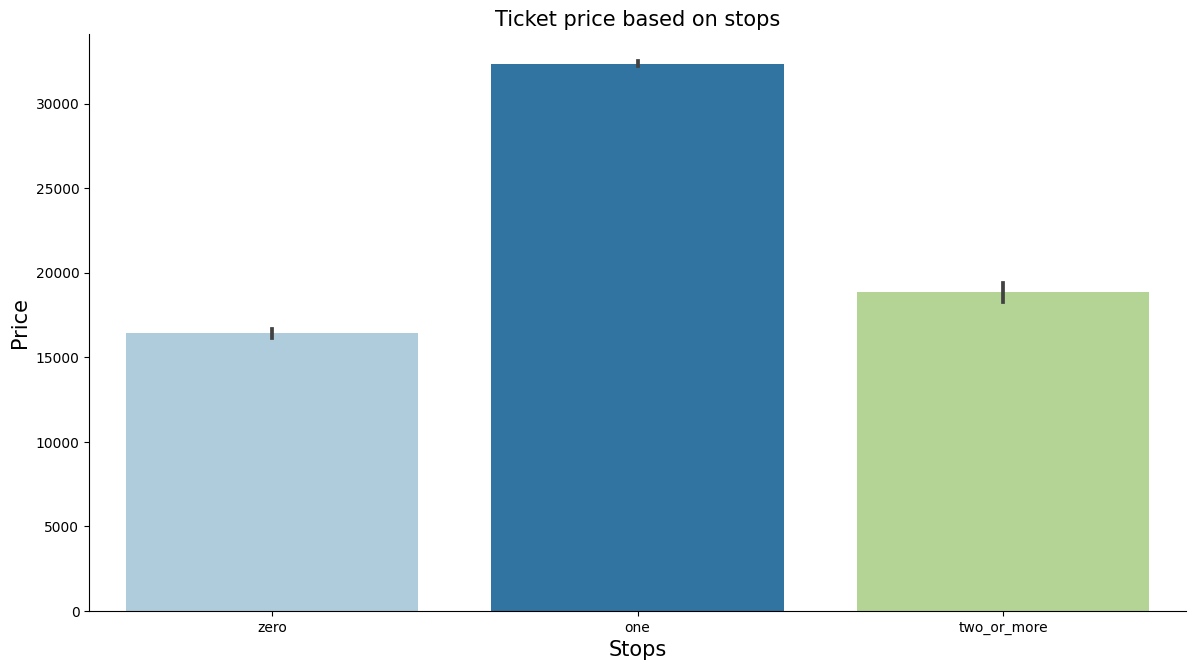

In [253]:
sns.catplot(data=df, kind="bar", x="stops", y="price", height=6.5, aspect=12/6.5 ,palette='Paired')
plt.title('Ticket price based on stops',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Harga tiket jauh lebih mahal jika penerbangan melakukan 1x transit daripada tidak transit atau transit 2x atau lebih.

# 5 - Data Preprocessing

Drop kolom Airlines, unnamed dan flight karena tidak relevan

In [254]:
df = df.drop(['Unnamed: 0','flight','airline'], axis = 1)

In [255]:
df.head()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
1,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
2,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
3,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
4,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060


Dapatkan data untuk model inference

In [256]:
data_inf = df.sample(10, random_state=1)
data_inf

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
74204,Delhi,Night,zero,Night,Kolkata,Business,2.25,36,27976
34919,Bangalore,Evening,one,Morning,Hyderabad,Economy,13.75,44,6133
58683,Chennai,Afternoon,one,Night,Delhi,Economy,11.25,26,8803
75704,Delhi,Morning,one,Night,Hyderabad,Business,12.08,28,53937
18071,Mumbai,Morning,one,Night,Kolkata,Economy,12.33,8,11129
111698,Hyderabad,Afternoon,one,Evening,Delhi,Business,5.17,24,51875
34351,Bangalore,Early_Morning,one,Evening,Hyderabad,Economy,10.33,33,5871
65993,Chennai,Morning,one,Evening,Hyderabad,Economy,10.17,11,15563
89659,Mumbai,Morning,one,Evening,Chennai,Business,5.92,22,61933
23398,Mumbai,Afternoon,one,Night,Chennai,Economy,10.33,13,11129


Hapus data yang dijadikan inference set dari data yang akan digunakan sebagai model train-test

In [257]:
data_train_test = df.drop(data_inf.index)
data_train_test.head()

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
1,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
2,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
3,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
4,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060


Reset index

In [258]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

Split X dan y (drop kolom feature yang saling berkorelasi)

In [259]:
X = data_train_test.drop(['price'], axis=1)
y = data_train_test['price']

Split data sebagai Train set dan Test set

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (102279, 8)
Test Size  :  (25570, 8)


# 6 - Model Definition

Buat column tranform untuk dimasukkan ke dalam pipeline<br>

ct1 berisi :
 * OneHotEncoder untuk encoding kolom 'source_city','destination_city','class','departure_time','arrival_time'
 * OrdinalEncoder untuk encoding kolom 'stops'
 * PowerTransformer untuk normalize kolom 'duration'

ct2 berisi :
 * StandardScaler untuk scaling kolom 'days_left'

ct3 berisi :
 * RandomForestRegressor()

ct4 berisi :
 * LinearRegression()

ct5 berisi :
 * DecisionTreeRegressor()

ct6 berisi :
 * Lasso()

In [261]:
ct1=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),['source_city','destination_city','class','departure_time','arrival_time']),
    ('oes',OrdinalEncoder(categories=[['zero','one','two_or_more']],handle_unknown='use_encoded_value',unknown_value=3),['stops']),
    ('pt',PowerTransformer(),['duration']),
],remainder='passthrough')

In [262]:
ct2=ColumnTransformer(transformers=[
    ('scaler',StandardScaler(),[7])
],remainder='passthrough')

In [263]:
ct3=RandomForestRegressor()
ct4=LinearRegression()
ct5=DecisionTreeRegressor()
ct6=Lasso()

Jadikan pipelien untuk tiap model

In [264]:
pipe1=Pipeline([
    ('ct1',ct1),
    ('ct2',ct2),
    ('ct3',ct3)
])
pipe2=Pipeline([
    ('ct1',ct1),
    ('ct2',ct2),
    ('ct4',ct4)
])
pipe3=Pipeline([
    ('ct1',ct1),
    ('ct2',ct2),
    ('ct5',ct5)
])
pipe4=Pipeline([
    ('ct1',ct1),
    ('ct2',ct2),
    ('ct6',ct6)
])

# 7 - Model Training

Train tiap model 

In [265]:
set_config(display='diagram')
pipe1.fit(X_train,y_train)

Pipeline(steps=[('ct1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['source_city',
                                                   'destination_city', 'class',
                                                   'departure_time',
                                                   'arrival_time']),
                                                 ('oes',
                                                  OrdinalEncoder(categories=[['zero',
                                                                              'one',
                                                                              'two_or_more']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=3),
                                                  ['stops']),
                                                 ('pt', PowerTransformer(),
                                                  ['duration'])])),
                ('ct2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [7])])),
                ('ct3', RandomForestRegressor())])

In [266]:
set_config(display='diagram')
pipe2.fit(X_train,y_train)

Pipeline(steps=[('ct1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['source_city',
                                                   'destination_city', 'class',
                                                   'departure_time',
                                                   'arrival_time']),
                                                 ('oes',
                                                  OrdinalEncoder(categories=[['zero',
                                                                              'one',
                                                                              'two_or_more']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=3),
                                                  ['stops']),
                                                 ('pt', PowerTransformer(),
                                                  ['duration'])])),
                ('ct2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [7])])),
                ('ct4', LinearRegression())])

In [267]:
set_config(display='diagram')
pipe3.fit(X_train,y_train)

Pipeline(steps=[('ct1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['source_city',
                                                   'destination_city', 'class',
                                                   'departure_time',
                                                   'arrival_time']),
                                                 ('oes',
                                                  OrdinalEncoder(categories=[['zero',
                                                                              'one',
                                                                              'two_or_more']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=3),
                                                  ['stops']),
                                                 ('pt', PowerTransformer(),
                                                  ['duration'])])),
                ('ct2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [7])])),
                ('ct5', DecisionTreeRegressor())])

In [268]:
set_config(display='diagram')
pipe4.fit(X_train,y_train)

Pipeline(steps=[('ct1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['source_city',
                                                   'destination_city', 'class',
                                                   'departure_time',
                                                   'arrival_time']),
                                                 ('oes',
                                                  OrdinalEncoder(categories=[['zero',
                                                                              'one',
                                                                              'two_or_more']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=3),
                                                  ['stops']),
                                                 ('pt', PowerTransformer(),
                                                  ['duration'])])),
                ('ct2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [7])])),
                ('ct6', Lasso())])

# 8 - Model Evaluation

Evaluasi hasil tiap model

In [269]:
y_pred_train_rf = pipe1.predict(X_train)
y_pred_test_rf = pipe1.predict(X_test)

y_pred_train_rf

array([ 6895.5 ,  6647.18, 63979.  , ..., 66928.  , 69175.17, 16648.  ])

In [270]:
print('r2_score - Train Set : ', r2_score(y_train, y_pred_train_rf))
print('r2_score - Test Set  : ', r2_score(y_test, y_pred_test_rf))
print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_rf,squared = False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_rf,squared = False))

r2_score - Train Set :  0.9962074783255872
r2_score - Test Set  :  0.978533155826299
RMSE - Train Set :  1580.3883140587345
RMSE - Test Set  :  3741.4592043721414


r2 score yang didapatkan dari data train dan test mirip sehingga bisa dibilang goodfit. nilai r2 score sangat bagus, hampir mendekati 1 yang berarti errornya sangat kecil. RMSE menandakan adanya error dalam prediksi yang berakibat harga yang terprediksi bisa menyimpang lebih atau kurang dari nilai RMSE.

In [271]:
y_pred_train_lr = pipe2.predict(X_train)
y_pred_test_lr = pipe2.predict(X_test)

y_pred_train_lr

array([ 9545.99024335, 10235.27562843, 57227.39930865, ...,
       54502.31123957, 54871.85493225, 11983.97646192])

In [272]:
print('r2_score - Train Set : ', r2_score(y_train, y_pred_train_lr))
print('r2_score - Test Set  : ', r2_score(y_test, y_pred_test_lr))
print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_lr, squared = False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_lr, squared = False))

r2_score - Train Set :  0.8998907230817789
r2_score - Test Set  :  0.9006086695104116
RMSE - Train Set :  8119.643025678151
RMSE - Test Set  :  8050.654045091466


r2 score yang didapatkan dari data train dan test mirip sehingga bisa dibilang goodfit. nilai r2 score bagus, mendekati 1 yang berarti errornya sangat kecil. RMSE menandakan adanya error dalam prediksi yang berakibat harga yang terprediksi bisa menyimpang lebih atau kurang dari nilai RMSE.

In [273]:
y_pred_train_dt = pipe3.predict(X_train)
y_pred_test_dt = pipe3.predict(X_test)

y_pred_train_dt

array([ 7025.,  6450., 63979., ..., 66928., 69168., 16169.])

In [274]:
print('r2_score - Train Set : ', r2_score(y_train, y_pred_train_dt))
print('r2_score - Test Set  : ', r2_score(y_test, y_pred_test_dt))
print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_dt, squared = False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_dt, squared = False))

r2_score - Train Set :  0.9987300659436597
r2_score - Test Set  :  0.9660872771704844
RMSE - Train Set :  914.5140013103534
RMSE - Test Set  :  4702.6021976918755


r2 score yang didapatkan dari data train dan test mirip sehingga bisa dibilang goodfit. nilai r2 score sangat bagus, hampir mendekati 1 yang berarti errornya sangat kecil. RMSE menandakan adanya error dalam prediksi yang berakibat harga yang terprediksi bisa menyimpang lebih atau kurang dari nilai RMSE.

In [275]:
y_pred_train_las = pipe4.predict(X_train)
y_pred_test_las = pipe4.predict(X_test)

y_pred_train_las

array([ 9547.43727948, 10235.66549851, 57202.25564237, ...,
       54530.42888283, 54863.08318367, 11984.74034698])

In [276]:
print('r2_score - Train Set : ', r2_score(y_train, y_pred_train_las))
print('r2_score - Test Set  : ', r2_score(y_test, y_pred_test_las))
print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_las, squared = False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_las, squared = False))

r2_score - Train Set :  0.8998901113431229
r2_score - Test Set  :  0.9006131158736554
RMSE - Train Set :  8119.667834027969
RMSE - Test Set  :  8050.473966344103


r2 score yang didapatkan dari data train dan test mirip sehingga bisa dibilang goodfit. nilai r2 score bagus, hampir mendekati 1 yang berarti errornya sangat kecil. RMSE menandakan adanya error dalam prediksi yang berakibat harga yang terprediksi bisa menyimpang lebih atau kurang dari nilai RMSE.

# Tuning

Tune model lasso karena memiliki r2 score paling buruk dari model lainnya (walaupun masih bisa dibilang bagus)

pilih hyperparameter alpha yang akan di tune

In [277]:
param_grid = {'ct6__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

lakukan gridsearch

In [278]:
grid = GridSearchCV(pipe4, param_grid=param_grid, cv=5)

train model yang sudah di tune 

In [279]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['source_city',
                                                                          'destination_city',
                                                                          'class',
                                                                          'departure_time',
                                                                          'arrival_time']),
                                                                        ('oes',
                                                                         OrdinalEncoder(categories=[['zero',
                                                                                                     'one',
                                                                                                     'two_or_more']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=3),
                                                                         ['stops']),
                                                                        ('pt',
                                                                         PowerTransformer(),
                                                                         ['duration'])])),
                                       ('ct2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         [7])])),
                                       ('ct6', Lasso())]),
             param_grid={'ct6__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                        100]})

In [280]:
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'ct6__alpha': 1e-05}


prediksi data dengan model yang sudah di tune

In [281]:
y_pred_train_last = grid.predict(X_train)
y_pred_test_last = grid.predict(X_test)

y_pred_train_last

array([ 9545.99025787, 10235.27563231, 57227.39905734, ...,
       54502.31152032, 54871.85484456, 11983.97646968])

In [282]:
print('r2_score - Train Set : ', r2_score(y_train, y_pred_train_last))
print('r2_score - Test Set  : ', r2_score(y_test, y_pred_test_last))
print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train_last, squared = False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test_last, squared = False))

r2_score - Train Set :  0.8998907230817789
r2_score - Test Set  :  0.9006086695612214
RMSE - Train Set :  8119.643025678153
RMSE - Test Set  :  8050.654043033685


r2_score - Train Set :  0.8998901113431229
r2_score - Test Set  :  0.9006131158736554
RMSE - Train Set :  8119.667834027969
RMSE - Test Set  :  8050.473966344103

Setelah dilakukan tuning, model Lasso ini perubahannya hampir tidak terlihat karena r2_score yang sangat mirip dengan model sebelum di tune. Perbedaannya kurang dari 0.0001 sehingga tidak relevan. untuk RMSE, perbedannya juga kurang dari 1 jadi tidak relevan.

# 10 - Model Saving

save model terbaik yaitu pipe1 atau random forest regression

In [283]:
with open('best.pkl', 'wb') as file_1:
  joblib.dump(pipe1, file_1)

# 11 - Model Inference

Load model

In [284]:
with open('best.pkl', 'rb') as file_1:
  best = joblib.load(file_1)
  

Load data inference dan ambil featurenya saja

In [285]:
data_inf.head(2)

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Delhi,Night,zero,Night,Kolkata,Business,2.25,36,27976
1,Bangalore,Evening,one,Morning,Hyderabad,Economy,13.75,44,6133


In [286]:
data_inf2 = data_inf.drop(['price'], axis =1)
data_inf2

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Delhi,Night,zero,Night,Kolkata,Business,2.25,36
1,Bangalore,Evening,one,Morning,Hyderabad,Economy,13.75,44
2,Chennai,Afternoon,one,Night,Delhi,Economy,11.25,26
3,Delhi,Morning,one,Night,Hyderabad,Business,12.08,28
4,Mumbai,Morning,one,Night,Kolkata,Economy,12.33,8
5,Hyderabad,Afternoon,one,Evening,Delhi,Business,5.17,24
6,Bangalore,Early_Morning,one,Evening,Hyderabad,Economy,10.33,33
7,Chennai,Morning,one,Evening,Hyderabad,Economy,10.17,11
8,Mumbai,Morning,one,Evening,Chennai,Business,5.92,22
9,Mumbai,Afternoon,one,Night,Chennai,Economy,10.33,13


predict dengan model yang sudah di load

In [287]:
y_pred_inf = best.predict(data_inf2)

jadikan dataframe dengan nama kolom predicted price

In [288]:
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Predicted price'])

concat dengan data inference awal

In [289]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Predicted price
0,Delhi,Night,zero,Night,Kolkata,Business,2.25,36,27976,29641.66
1,Bangalore,Evening,one,Morning,Hyderabad,Economy,13.75,44,6133,7815.41
2,Chennai,Afternoon,one,Night,Delhi,Economy,11.25,26,8803,8726.36
3,Delhi,Morning,one,Night,Hyderabad,Business,12.08,28,53937,54255.08
4,Mumbai,Morning,one,Night,Kolkata,Economy,12.33,8,11129,11129.00
5,Hyderabad,Afternoon,one,Evening,Delhi,Business,5.17,24,51875,51954.52
6,Bangalore,Early_Morning,one,Evening,Hyderabad,Economy,10.33,33,5871,5916.80
7,Chennai,Morning,one,Evening,Hyderabad,Economy,10.17,11,15563,14595.98
8,Mumbai,Morning,one,Evening,Chennai,Business,5.92,22,61933,62385.48
9,Mumbai,Afternoon,one,Night,Chennai,Economy,10.33,13,11129,11129.00


# 12 - Kesimpulan

1. Pada EDA, bisa dilihat bahwa kolom feature hampir semua berpengaruh ke target. hanya kolom unnamed, airlines, dan flight yang tidak berpengaruh.

2. Pada model Random Forest Regressor (pipe1), r2 score yang didapatkan dari data train dan test mirip sehingga bisa dibilang goodfit. nilai r2 score sangat bagus, hampir mendekati 1 yang berarti errornya sangat kecil. RMSE menandakan adanya error dalam prediksi yang berakibat harga yang terprediksi bisa menyimpang lebih atau kurang dari nilai RMSE.

3. Pada model Linear Regression (pipe2), r2 score yang didapatkan dari data train dan test mirip sehingga bisa dibilang goodfit. nilai r2 score bagus, mendekati 1 yang berarti errornya sangat kecil. RMSE menandakan adanya error dalam prediksi yang berakibat harga yang terprediksi bisa menyimpang lebih atau kurang dari nilai RMSE.

4. Pada model Decision Tree Regressor (pipe3), r2 score yang didapatkan dari data train dan test mirip sehingga bisa dibilang goodfit. nilai r2 score sangat bagus, hampir mendekati 1 yang berarti errornya sangat kecil. RMSE menandakan adanya error dalam prediksi yang berakibat harga yang terprediksi bisa menyimpang lebih atau kurang dari nilai RMSE.

5. Pada base model Lasso (pipe4), r2 score yang didapatkan dari data train dan test mirip sehingga bisa dibilang goodfit. nilai r2 score bagus, hampir mendekati 1 yang berarti errornya sangat kecil. RMSE menandakan adanya error dalam prediksi yang berakibat harga yang terprediksi bisa menyimpang lebih atau kurang dari nilai RMSE.

6. Tuning dilakukan ke model lasso dengan gridsearch dan hyperparameter yang di tune adalah alpha.

7. Setelah dilakukan tuning, model Lasso ini perubahannya hampir tidak terlihat karena r2_score yang sangat mirip dengan model sebelum di tune. Perbedaannya kurang dari 0.0001 sehingga tidak relevan. untuk RMSE, perbedannya juga kurang dari 1 jadi tidak relevan.

8. Hasil inferencing ada error dalam predicted price yang detil nya bisa dilihat di tabel diatas.